In [1]:
%cd ..

/home/soda/rcappuzz/work/benchmark-join-suggestions


In [2]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

The implementation of Metam can handle only binary classification. To get it to run quickly I am converting the target in 
the table we are using from regression to classification. I am using arbitrary thresholds for the masks.

Note that the point is having "something" that can be used to perform binary classification, it's not about having a 
perfect task. 

# Movies

In [3]:
threshold = 8 # class 1 for targets > 8, class 0 for targets <= 8 

In [4]:
df_path = Path("data/source_tables/movies-yadl-ax.parquet")
df = pl.read_parquet(df_path)

<Axes: xlabel='target', ylabel='Count'>

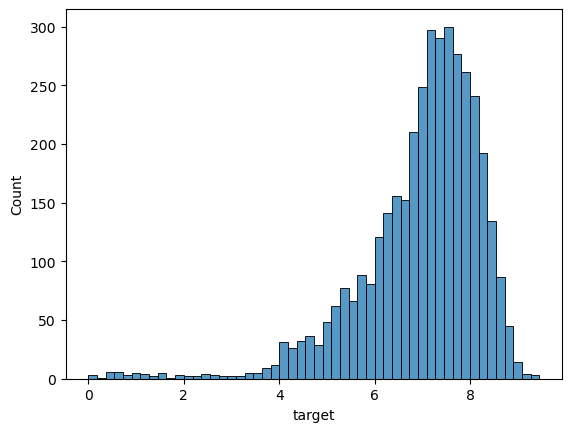

In [5]:
sns.histplot(data=df.to_pandas(), x="target")

In [6]:
df = df.with_columns(pl.when(pl.col("target")>threshold).then(1).otherwise(0).alias("target_binary"))
df.drop("target").rename({"target_binary": "class"}).write_parquet(df_path.with_stem(df_path.stem + "-binary"))


# US Accidents

In [7]:
df_path = Path("data/source_tables/us-accidents-yadl-ax.parquet")
df = pl.read_parquet(df_path)

In [8]:
threshold = 2 # class 1 for targets > 2, class 0 for targets <= 2

<Axes: xlabel='target', ylabel='Count'>

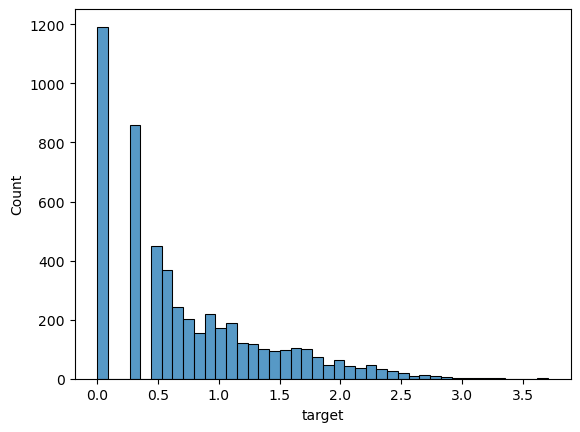

In [9]:
sns.histplot(data=df.to_pandas(), x="target")

In [10]:
df = df.with_columns(pl.when(pl.col("target")>threshold).then(1).otherwise(0).alias("target_binary"))
df.drop("target").rename({"target_binary": "class"}).write_parquet(df_path.with_stem(df_path.stem + "-binary"))


# US Elections

In [11]:
df_path = Path("data/source_tables/us-presidential-results-yadl-ax.parquet")
df = pl.read_parquet(df_path)

<Axes: xlabel='target', ylabel='Count'>

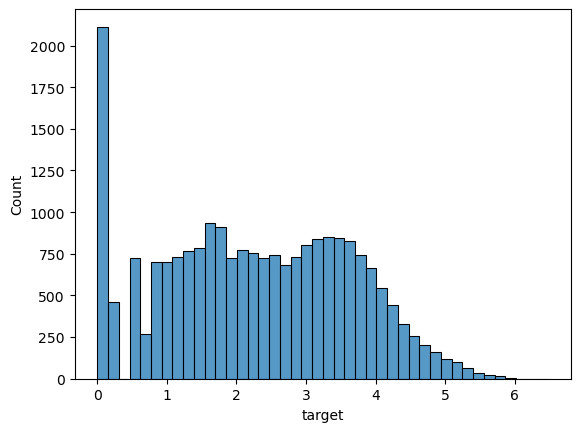

In [12]:
sns.histplot(data=df.to_pandas(), x="target")

In [13]:
threshold = 4 # class 1 for targets > 4, class 0 for targets <= 4

In [14]:
df = df.with_columns(pl.when(pl.col("target")>threshold).then(1).otherwise(0).alias("target_binary"))
df.drop("target").rename({"target_binary": "class"}).write_parquet(df_path.with_stem(df_path.stem + "-binary"))


# Company employees

In [15]:
df_path = Path("data/source_tables/company-employees-yadl-ax.parquet")
df = pl.read_parquet(df_path)

<Axes: xlabel='target', ylabel='Count'>

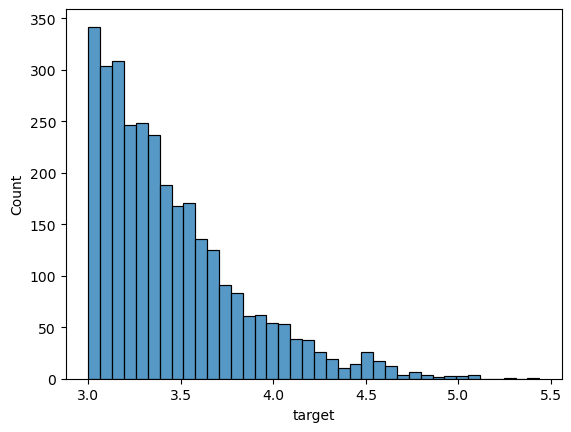

In [16]:
sns.histplot(data=df.to_pandas(), x="target")

In [17]:
threshold = 4 # class 1 for targets > 4, class 0 for targets <= 4

In [18]:
df = df.with_columns(pl.when(pl.col("target")>threshold).then(1).otherwise(0).alias("target_binary"))
df.drop("target").rename({"target_binary": "class"}).write_parquet(df_path.with_stem(df_path.stem + "-binary"))
